In [43]:
## Importing necessary libraries and necessary settings 


import pandas as pd 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from ydata_profiling import ProfileReport

In [44]:
#Importing the data 

df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [52]:
df = df.drop(columns=['Id'])


In [53]:
#Shape of the dataframe
col = df.shape[0]
num = df.shape[1]
print(f"Following dataset has {col} columns and {num} rows")


Following dataset has 252000 columns and 12 rows


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.0,10.0,15.0,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.0,12.0,13.0,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.0,0.0,0.0,1.0


In [47]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB
None


In [56]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [57]:
df.columns = ['income', 'age', 'experience', 'marital_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag']

numerical = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
categorical = ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"] 

In [58]:
df[numerical].skew()

income               0.005958
age                 -0.005316
experience          -0.012779
current_job_yrs      0.273146
current_house_yrs    0.006786
dtype: float64

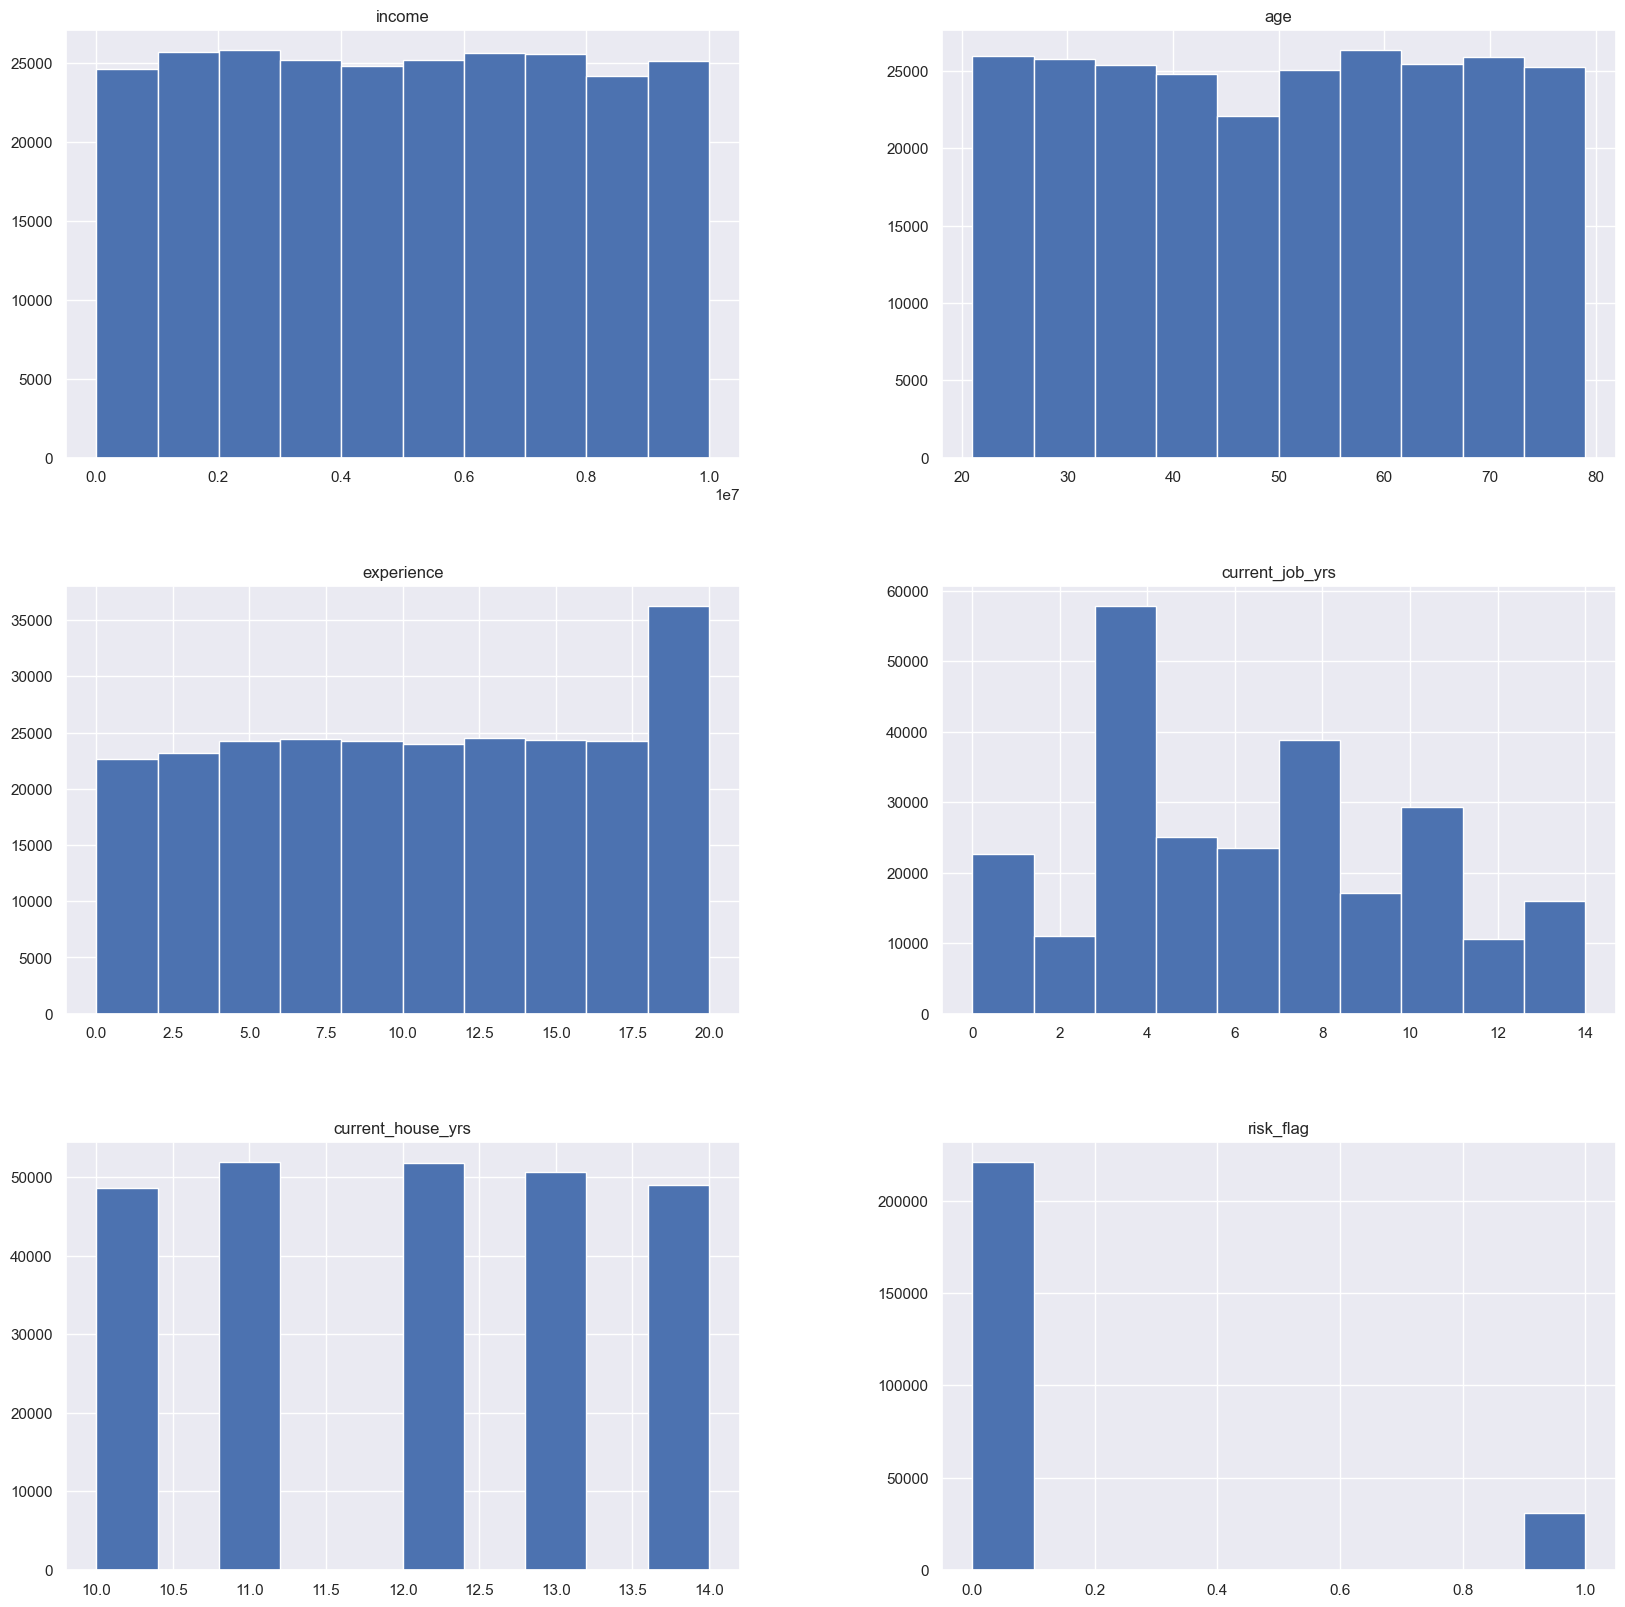

In [66]:
df.hist( figsize = (20, 20))
plt.show()

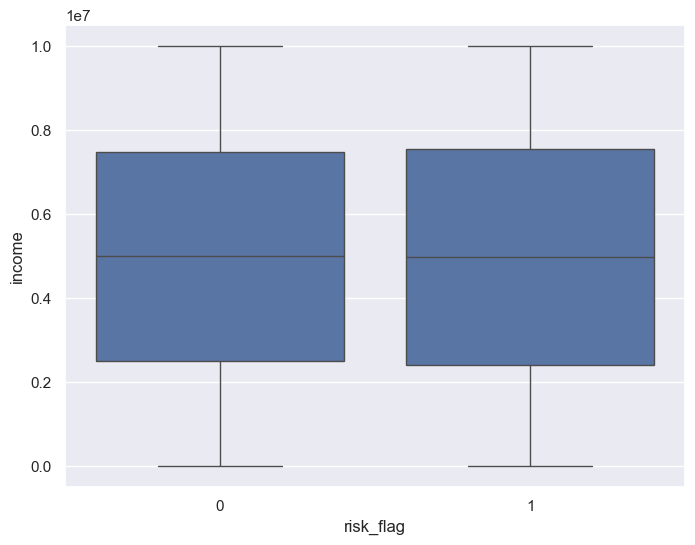

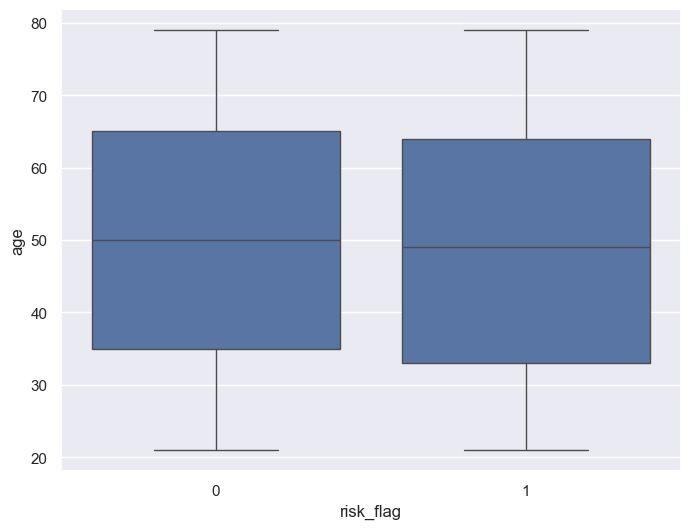

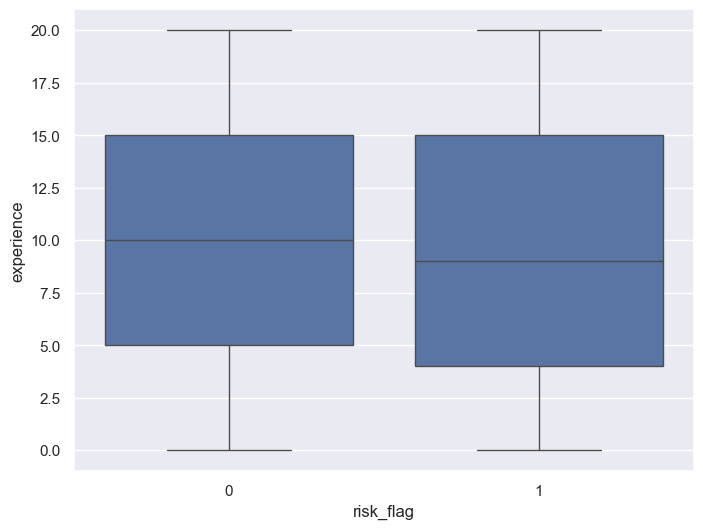

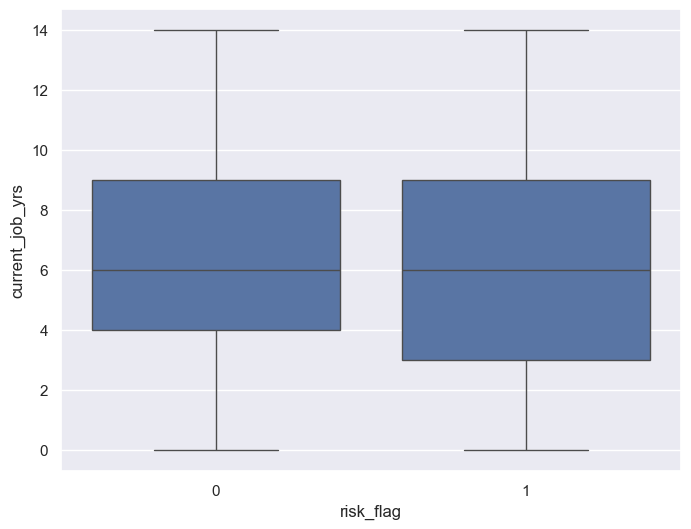

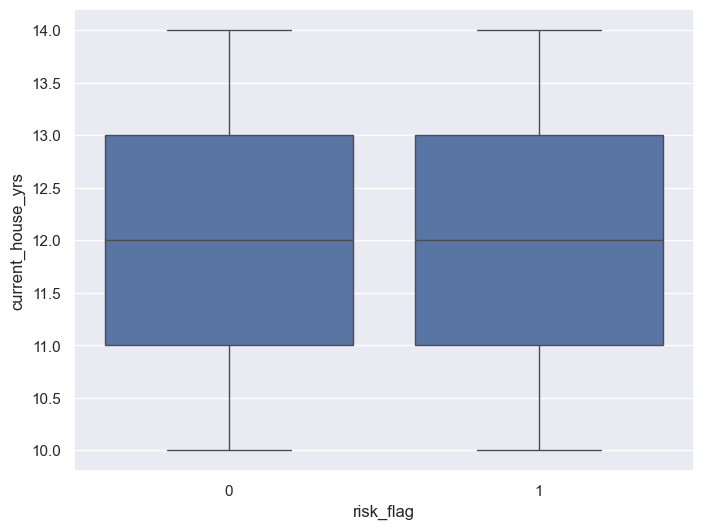

In [63]:
for numerical in ["income","age","experience","current_job_yrs","current_house_yrs"]:
    fig, ax = plt.subplots( figsize = (8,6) )
    sns.boxplot(x = "risk_flag", y = numerical, data = df)

There are no remarkable outliers that needs to be treated

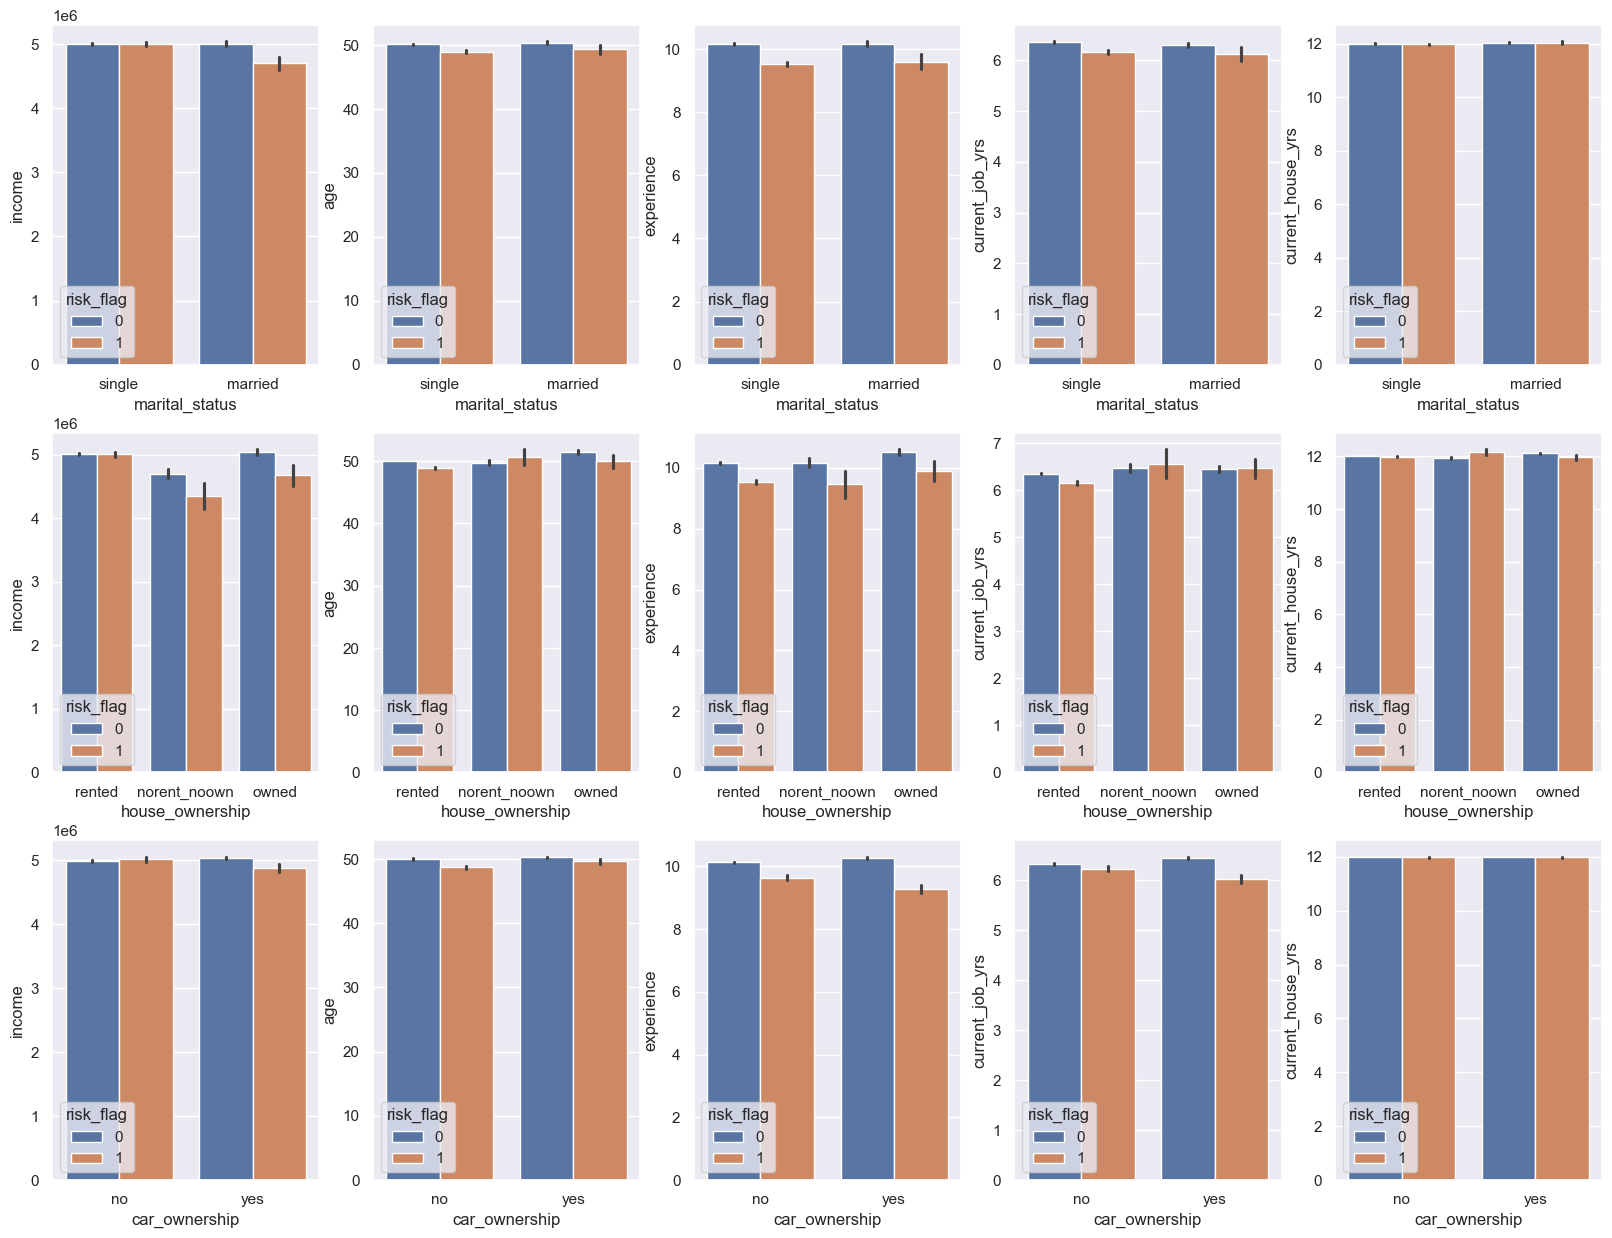

<Figure size 5000x5000 with 0 Axes>

In [70]:
num = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
cat = ["marital_status", "house_ownership", "car_ownership"]

fig, ax = plt.subplots(3, 5, figsize=(20, 15))

plt.figure(figsize=(50, 50))
for c in range( len(cat) ):
    for n in range( len(num) ):
        cat_feature = cat[c]
        num_feature = num[n]
        sns.barplot( x=cat_feature, y=num_feature, hue='risk_flag', data = df, ax=ax[c,n])
    
        
plt.show()

We can see that variables have different scales all together,which interprets that scaling needs to be performed

<Axes: xlabel='house_ownership', ylabel='count'>

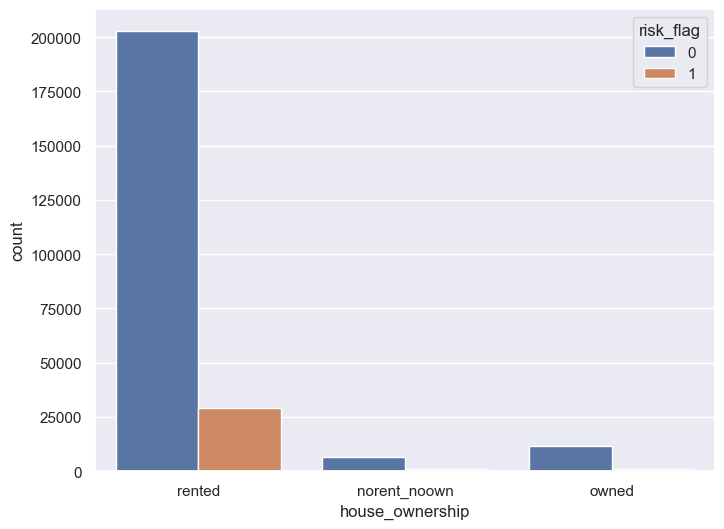

In [71]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='house_ownership', hue='risk_flag', ax=ax, data=df)

We can see that rented house people are more in number which interprets that they are the one who avail loan facility

<Axes: xlabel='car_ownership', ylabel='count'>

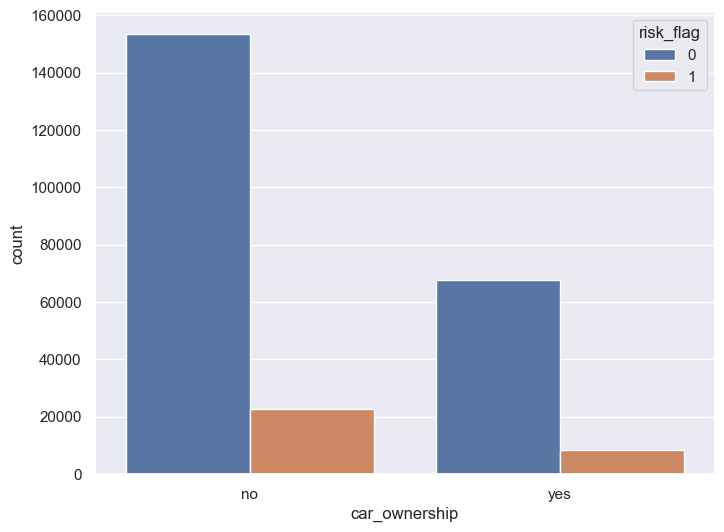

In [73]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='car_ownership', hue='risk_flag', ax=ax, data=df)

People with no car are more likley to be 

<Axes: xlabel='marital_status', ylabel='count'>

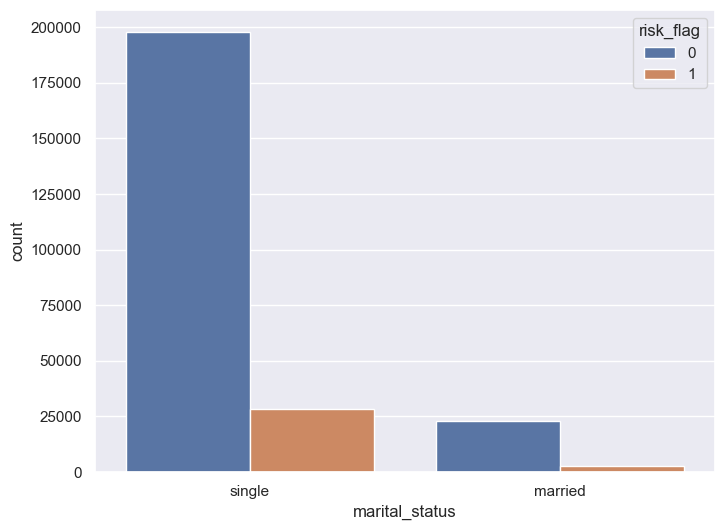

In [75]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='marital_status', hue='risk_flag', data=df )

In [102]:
df.groupby('profession')['risk_flag'].mean().sort_values(ascending=False).head(10)

profession
Police_officer          0.164052
Chartered_Accountant    0.153572
Army_officer            0.152113
Surveyor                0.151464
Software_Developer      0.148427
Scientist               0.144321
Geologist               0.144264
Civil_engineer          0.135832
Official                0.135796
Firefighter             0.135789
Name: risk_flag, dtype: float64

In [103]:
df.groupby('state')['risk_flag'].mean().sort_values(ascending=False).head(10)

state
Manipur              0.215548
Tripura              0.168109
Kerala               0.167097
Jammu_and_Kashmir    0.158989
Madhya_Pradesh       0.154369
Odisha               0.142550
Rajasthan            0.140833
Jharkhand            0.133296
Chhattisgarh         0.133281
Himachal_Pradesh     0.133253
Name: risk_flag, dtype: float64

In [104]:
df.groupby('city')['risk_flag'].mean().sort_values(ascending=False).head(10)

city
Bhubaneswar    0.326194
Gwalior        0.272727
Bettiah[33]    0.266958
Kochi          0.252862
Raiganj        0.239554
Purnia[26]     0.238866
Barasat        0.238702
Sikar          0.238452
Buxar[37]      0.231472
Satna          0.225681
Name: risk_flag, dtype: float64

In [109]:
# Assuming df is your DataFrame
defaulters_count = df[df['risk_flag'] == 0].groupby('city').size().sort_values(ascending=False).head(10)
print(defaulters_count)


city
Vijayanagaram    1110
Saharsa[29]      1067
Bulandshahr      1061
Bhopal           1042
Vijayawada       1025
New_Delhi        1024
Bellary           992
Bareilly          992
Satara            992
Jodhpur           974
dtype: int64


In [112]:
ndefaulters_count = df[df['risk_flag'] == 1].groupby('city').size().sort_values(ascending=False).head(10)
print(ndefaulters_count)

city
Kochi          243
Satna          232
Buxar[37]      228
Srinagar       216
Indore         212
Barasat        206
Mango          200
Bhubaneswar    198
Ghaziabad      196
Sikar          191
dtype: int64
